This script generates correlation table and also plot of doped vs undoped metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('twist_covid_filtered+normalized_counts.csv')
data = data[data['doped_match']!='match'] #Keep only covid sequences 
data

/Users/brooke/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,40,42,43,47,51,55,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,name,dna,count_ doped-401 R0 (doped),count_ doped-402 R0 (doped),count_ doped-404 R0 (doped),count_ doped-401 post-R1,count_ doped-402 post-R1,count_ doped-404 post-R1,...,frac_ undoped-404 post-R2 - positive,frac_ undoped-401 post-R2 - negative,frac_ undoped-402 post-R2 - negative,frac_ undoped-404 post-R2 - negative,frac_ undoped-401 post-R3 - positive,frac_ undoped-402 post-R3 - positive,frac_ undoped-404 post-R3 - positive,frac_ undoped-401 post-R3 - negative,frac_ undoped-402 post-R3 - negative,frac_ undoped-404 post-R3 - negative
0,0,0,MESLVPGFNEKTHVQ,ATGGAATCACTAGTTCCTGGATTCAATGAAAAGACTCATGTTCAA,0.0,0.0,0.0,3.0,3.0,0.0,...,0.000036,0.000171,0.000235,0.000117,0.000016,0.000025,0.000016,0.000149,0.000159,0.000059
1,1,1,ESLVPGFNEKTHVQL,GAGAGTTTAGTGCCTGGTTTCAACGAAAAAACCCATGTTCAGTTA,0.0,0.0,0.0,2.0,3.0,0.0,...,0.000032,0.000214,0.000185,0.000215,0.000000,0.000000,0.000000,0.000050,0.000036,0.000064
2,2,2,SLVPGFNEKTHVQLS,TCACTTGTTCCCGGTTTCAACGAAAAGACACACGTACAATTATCT,0.0,0.0,0.0,0.0,1.0,2.0,...,0.000044,0.000135,0.000178,0.000193,0.000016,0.000008,0.000012,0.000069,0.000043,0.000107
3,3,3,LVPGFNEKTHVQLSL,TTGGTACCTGGTTTCAACGAGAAAACACATGTTCAATTATCTTTG,1.0,0.0,0.0,1.0,0.0,6.0,...,0.000000,0.000114,0.000178,0.000026,0.000000,0.000000,0.000000,0.000044,0.000050,0.000000
4,4,4,VPGFNEKTHVQLSLP,GTTCCAGGCTTTAACGAGAAGACCCATGTTCAATTATCTCTGCCG,0.0,0.0,0.0,0.0,25.0,1.0,...,0.000004,0.000014,0.000029,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,5,PGFNEKTHVQLSLPV,CCAGGATTTAATGAAAAAACTCATGTGCAATTGAGTCTACCCGTA,0.0,0.0,0.0,0.0,3.0,20.0,...,0.000012,0.000107,0.000078,0.000058,0.000000,0.000000,0.000000,0.000000,0.000014,0.000021
6,6,6,GFNEKTHVQLSLPVL,GGCTTTAATGAAAAAACACATGTACAACTTAGTCTACCAGTTCTC,0.0,0.0,0.0,0.0,6.0,3.0,...,0.000095,0.000114,0.000249,0.000270,0.000016,0.000008,0.000023,0.000044,0.000079,0.000139
7,7,7,FNEKTHVQLSLPVLQ,TTCAACGAGAAGACTCATGTTCAGCTGTCTTTGCCAGTTTTGCAG,1.0,0.0,0.0,1.0,4.0,10.0,...,0.000194,0.000185,0.000356,0.000496,0.000016,0.000038,0.000121,0.000106,0.000180,0.000417
8,8,8,NEKTHVQLSLPVLQV,AATGAGAAAACTCATGTCCAATTGTCATTGCCTGTTCTGCAAGTT,0.0,0.0,1.0,7.0,13.0,22.0,...,0.000107,0.000199,0.000356,0.000383,0.000033,0.000025,0.000051,0.000162,0.000159,0.000294
9,9,9,EKTHVQLSLPVLQVR,GAAAAGACGCACGTGCAACTTTCATTACCGGTTCTGCAAGTTAGA,0.0,0.0,0.0,1.0,0.0,11.0,...,0.000052,0.000071,0.000207,0.000091,0.000000,0.000008,0.000027,0.000037,0.000137,0.000107


In [3]:
# Make correlation table for all 401 rounds of selection
options = ['count_ doped-401 R0 (doped)',
       'count_ doped-401 post-R1 ', 
       'count_ doped-401 post-R2 ',
       'count_ doped-401 post-R3 ', 
       'count_ doped-401 post-R4 ',
       'count_ undoped-401 R0 (undoped)',
       'count_ undoped-401 post-R1 - positive ',
       'count_ undoped-401 post-R1 - negative ',
       'count_ undoped-401 post-R2 - positive ',
       'count_ undoped-401 post-R2 - negative ',
       'count_ undoped-401 post-R3 - positive ',
       'count_ undoped-401 post-R3 - negative ']

corrtable = pd.DataFrame(columns=options,index=options)

for x in options:
    for y in options:
        pearsonr, pearsonpval = stats.pearsonr(data[x],data[y])
        corrtable.loc[x,y]=pearsonr
        
corrtable.to_csv('COVID-peptides_counts-correlation-401-check.csv')

/Users/brooke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


Text(0.5, 0, 'Doped\n Round 3')

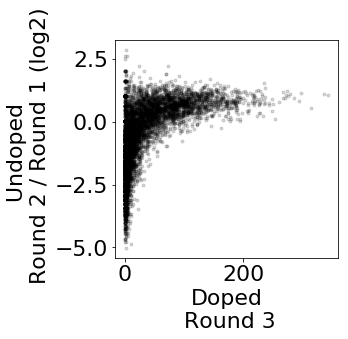

In [4]:
# Plot relationship between doped and undoped.
# From: analysis_compare_doped+undoped-PaperFigure.ipynb

plt.rcParams.update({'font.size': 22})

#undoped vs doped - fold change and count
plt.figure(figsize=(4,4))
plt.scatter(data['count_ doped-401 post-R3 '],
            np.log2(data['frac_ undoped-401 post-R2 - positive ']/data['frac_ undoped-401 post-R1 - positive ']), 
            marker='.', alpha=0.15,c='black')
plt.ylabel('Undoped \n Round 2 / Round 1 (log2)')
plt.xlabel('Doped\n Round 3')